In [2]:
import pandas as pd

titanic_df =pd.read_csv("C:/Users/KIIT/Desktop/Titanic-Dataset.csv", index_col=None)
print(titanic_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print("\nInformation about the dataset:")
print(titanic_df.info())

print("\nSummary statistics for numerical columns:")
print(titanic_df.describe())

print("\nMissing values in the dataset:")
print(titanic_df.isnull().sum())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary statistics for numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
print(titanic_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
mean_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age, inplace=True)

most_frequent_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(most_frequent_embarked, inplace=True)

titanic_df.drop('Cabin', axis=1, inplace=True)

print(titanic_df.isnull().sum())

titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Col": 7, "Major": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
titanic_df['Title'] = titanic_df['Title'].map(title_mapping)

titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

print(titanic_df.head())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500         1           0   
1         1       1  38.0      1      0  71.2833         0           0   
2         1       3  26.0      0      0   7.9250         0           0   
3         1       1  35.0      1      0  53.1000         0           0   
4         0       3  35.0      0      0   8.0500         1           0   

   Embarked_S  Title  
0           1    1.0  
1           0    3.0  
2           1    2.0  
3           1    3.0  
4           1    1.0  


In [9]:
print(titanic_df.isnull().sum())

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title         1
dtype: int64


In [10]:
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt

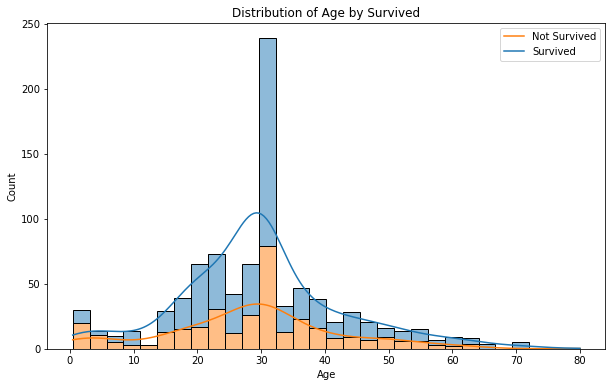

In [11]:
warnings.simplefilter(action='ignore', category=FutureWarning)

pt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='Age', bins=30, kde=True, hue='Survived', multiple='stack')
pt.title('Distribution of Age by Survived')
pt.xlabel('Age')
pt.ylabel('Count')
pt.legend(['Not Survived', 'Survived'])
pt.show()

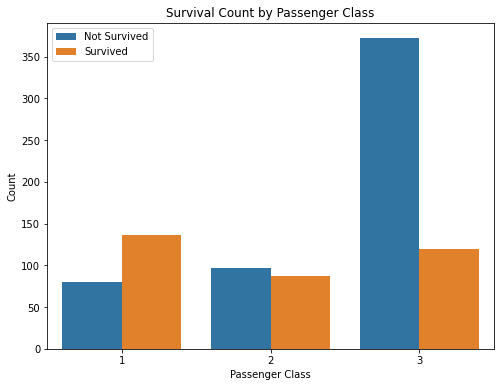

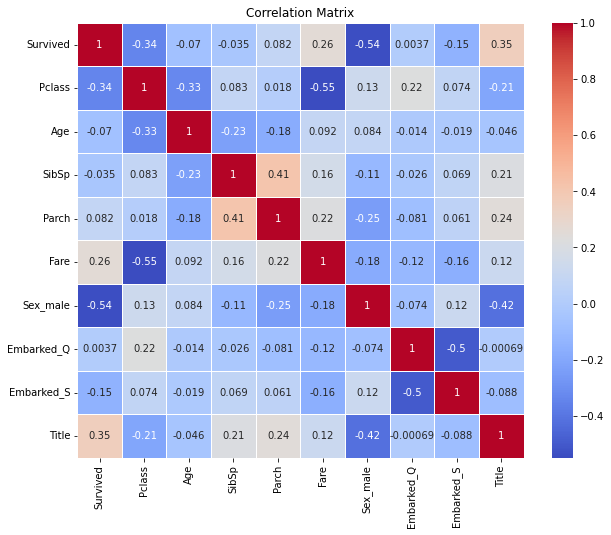

In [12]:
pt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Pclass', hue='Survived')
pt.title('Survival Count by Passenger Class')
pt.xlabel('Passenger Class')
pt.ylabel('Count')
pt.legend(['Not Survived', 'Survived'])
pt.show()

pt.figure(figsize=(10, 8))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
pt.title('Correlation Matrix')
pt.show()

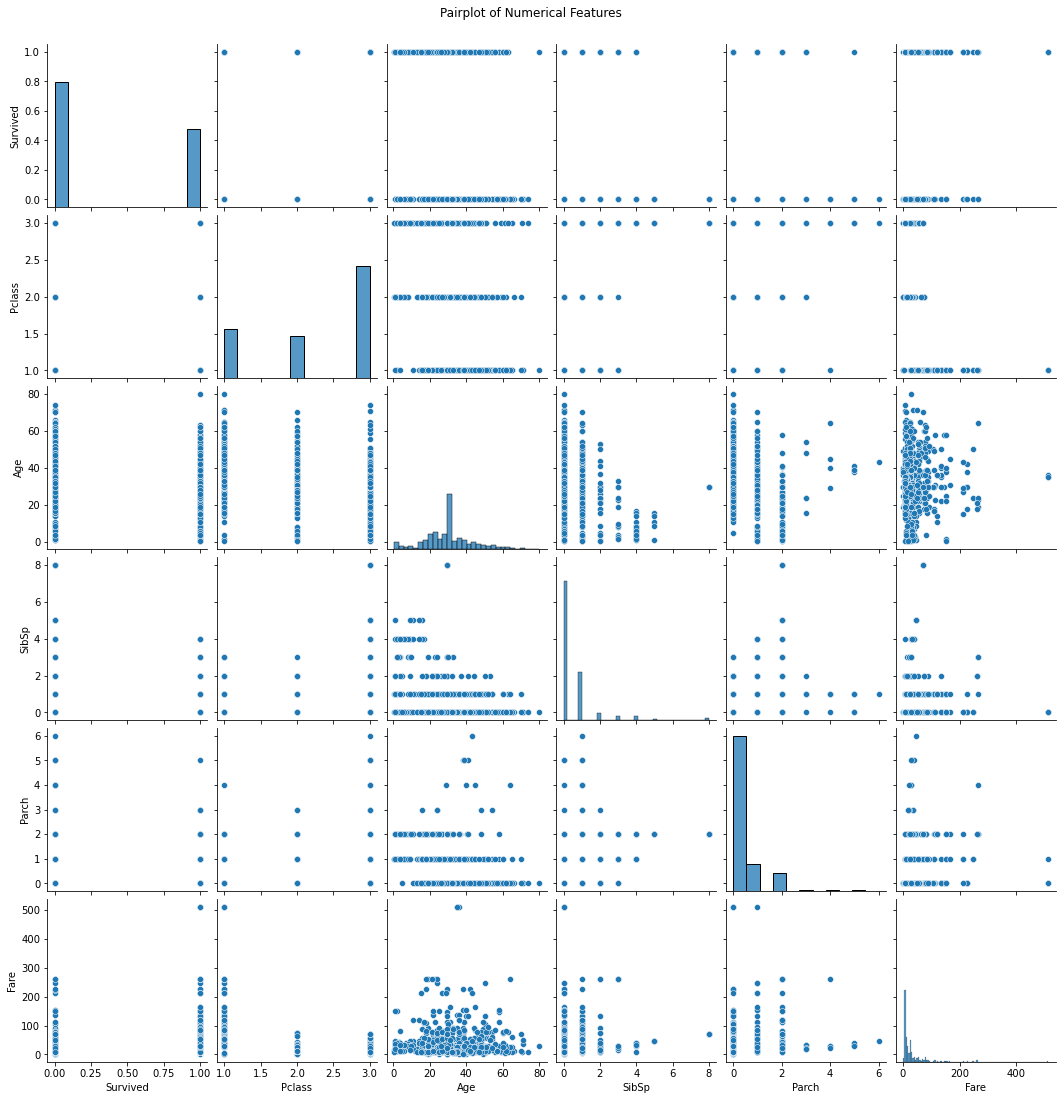

In [14]:
sns.pairplot(titanic_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
pt.suptitle('Pairplot of Numerical Features', y=1.02)
pt.show()

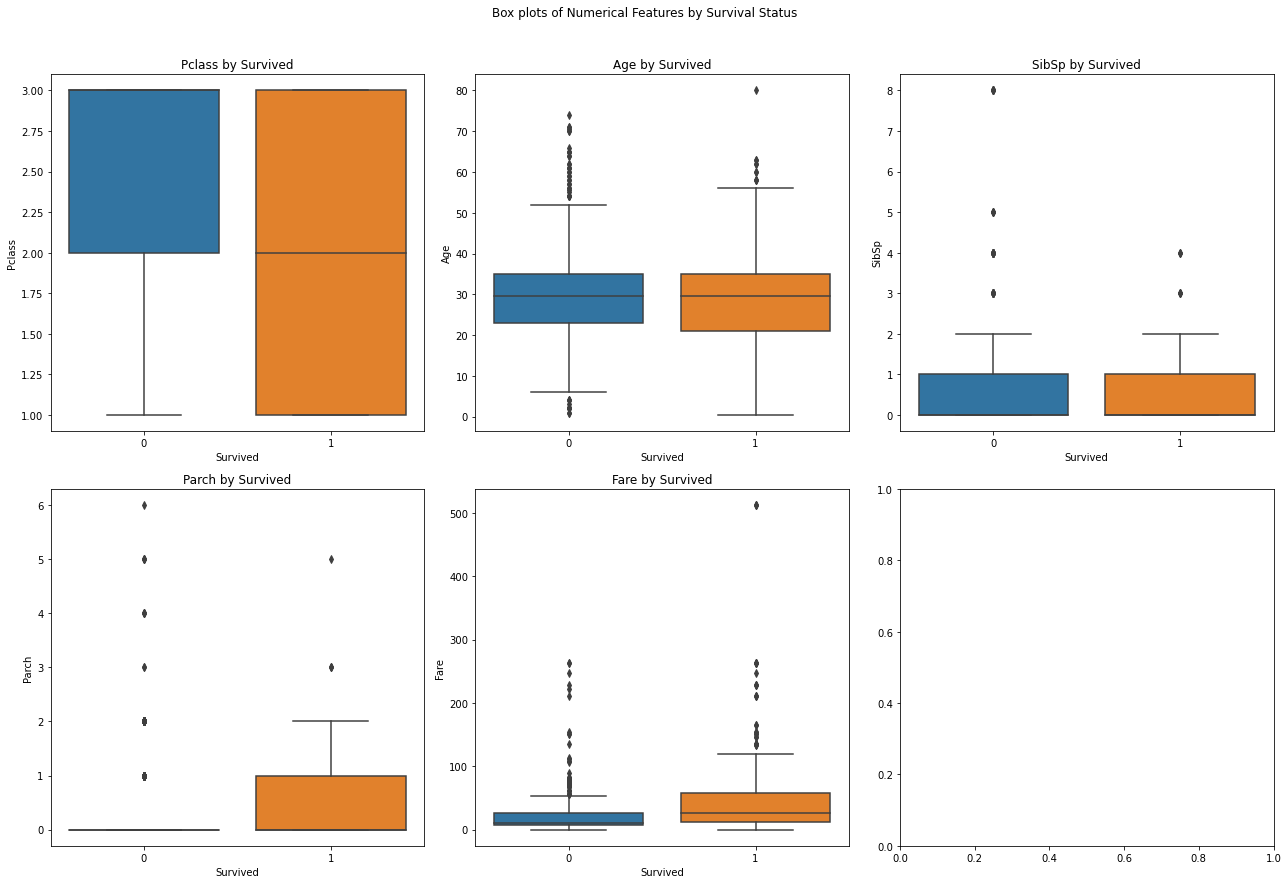

In [15]:
fig, axes = pt.subplots(2, 3, figsize=(18, 12))
for i, col in enumerate(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']):
    sns.boxplot(x='Survived', y=col, data=titanic_df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col} by Survived')
pt.suptitle('Box plots of Numerical Features by Survival Status', y=1.02)
pt.tight_layout()
pt.show()

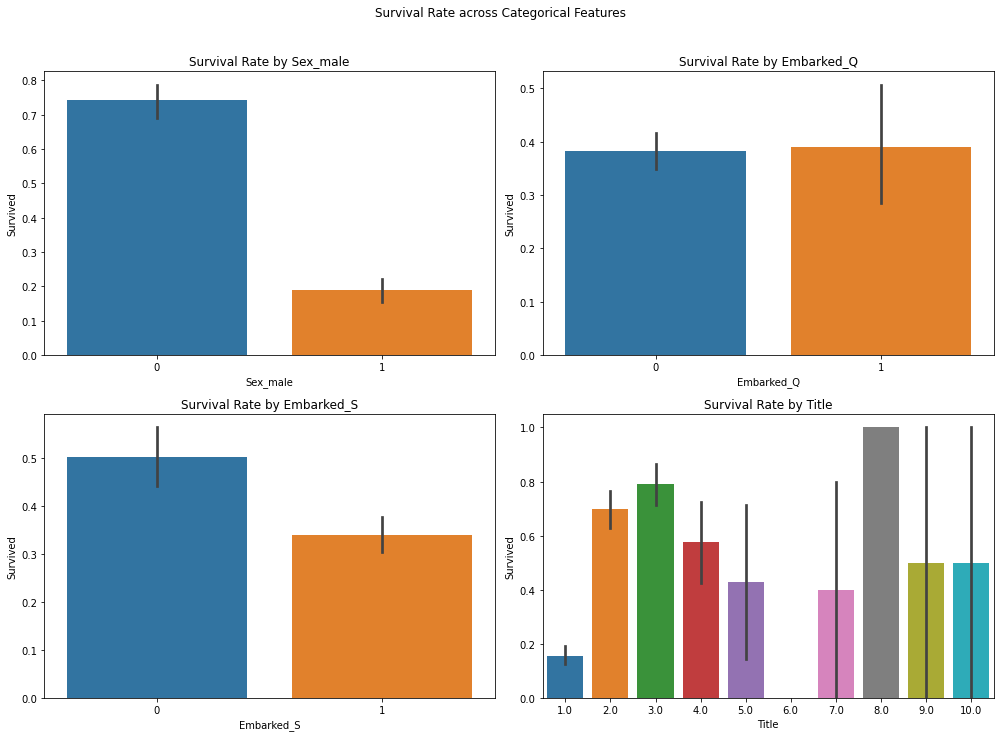

In [16]:
fig, axes = pt.subplots(2, 2, figsize=(14, 10))
for i, col in enumerate(['Sex_male', 'Embarked_Q', 'Embarked_S', 'Title']):
    sns.barplot(x=col, y='Survived', data=titanic_df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Survival Rate by {col}')
pt.suptitle('Survival Rate across Categorical Features', y=1.02)
pt.tight_layout()
pt.show()

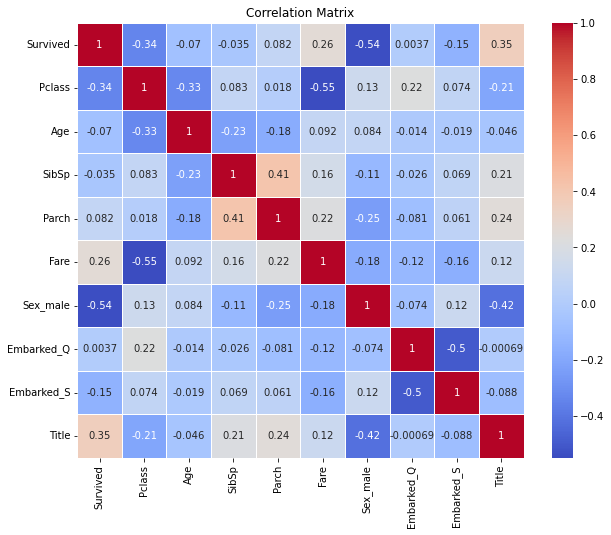

In [17]:
corr_matrix = titanic_df.corr()
pt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
pt.title('Correlation Matrix')
pt.show()

In [18]:
missing_values = titanic_df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Title'].fillna(titanic_df['Title'].mode()[0], inplace=True)

Missing values in the dataset:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title         1
dtype: int64


In [19]:
mode_title = titanic_df['Title'].mode()[0]
titanic_df['Title'].fillna(mode_title, inplace=True)

In [20]:
missing_values = titanic_df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title         0
dtype: int64


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer

X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_imputed, y)

feature_importances = rf_clf.feature_importances_

selector = SelectFromModel(rf_clf, threshold=0.05)
selector.fit(X_imputed, y)

selected_features_indices = selector.get_support(indices=True)

selected_features_names = X.columns[selected_features_indices]

print("Selected Features:")
print(selected_features_names)

Selected Features:
Index(['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_male', 'Title'], dtype='object')


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[selected_features_names], y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 6)
Shape of X_test: (179, 6)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    print(f"Training {name}...")

    if name in ['Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'K-Nearest Neighbors']:
        param_grid = {}  
        if name == 'Random Forest':
            param_grid = {'n_estimators': [100, 200, 300],
                          'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 5, 10]}
        elif name == 'Gradient Boosting':
            param_grid = {'n_estimators': [100, 200, 300],
                          'learning_rate': [0.01, 0.1, 0.5],
                          'max_depth': [3, 5, 7]}
        elif name == 'Support Vector Machine':
            param_grid = {'C': [0.1, 1, 10],
                          'kernel': ['linear', 'rbf', 'poly']}
        elif name == 'K-Nearest Neighbors':
            param_grid = {'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}
        
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled if name != 'K-Nearest Neighbors' else X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled if name != 'K-Nearest Neighbors' else X_test)
    else:
        model.fit(X_train_scaled if name != 'K-Nearest Neighbors' else X_train, y_train)
        y_pred = model.predict(X_test_scaled if name != 'K-Nearest Neighbors' else X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(f"Classification Report of {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix of {name}:")
    print(confusion_matrix(y_test, y_pred))
    print()

Training Logistic Regression...
Accuracy of Logistic Regression: 0.79
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix of Logistic Regression:
[[86 19]
 [19 55]]

Training Decision Tree...
Accuracy of Decision Tree: 0.74
Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       105
           1       0.69      0.68      0.68        74

    accuracy                           0.74       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179

Confusion Matrix of Decision Tree:
[[83 22]
 [24 50]]

Training Random 

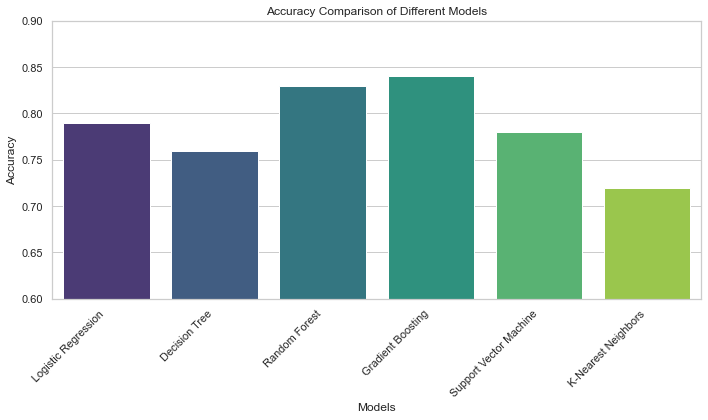

In [24]:
import seaborn as sns
import matplotlib.pyplot as pt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'K-Nearest Neighbors']
accuracies = [0.79, 0.76, 0.83, 0.84, 0.78, 0.72]

pt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=models, y=accuracies, palette="viridis")
pt.title('Accuracy Comparison of Different Models')
pt.xlabel('Models')
pt.ylabel('Accuracy')
pt.ylim(0.6, 0.9)  
pt.xticks(rotation=45, ha='right')  
pt.tight_layout()
pt.show()

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting:", accuracy_gb)

Accuracy of Gradient Boosting: 0.8268156424581006


In [26]:
print("Classification Report of Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

Classification Report of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [27]:
print("Confusion Matrix of Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))

Confusion Matrix of Gradient Boosting:
[[94 11]
 [20 54]]


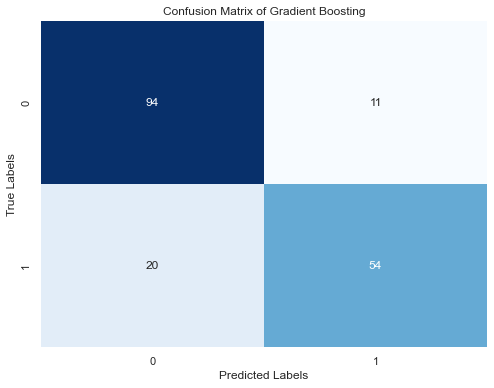

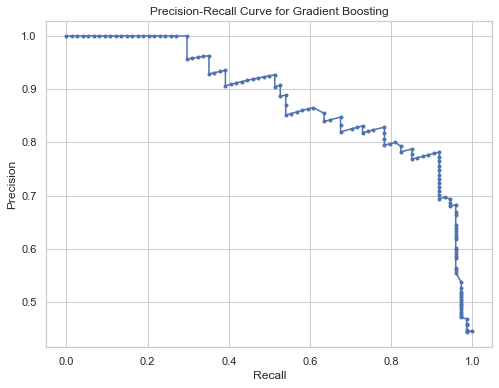

In [28]:
pt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues', cbar=False)
pt.xlabel('Predicted Labels')
pt.ylabel('True Labels')
pt.title('Confusion Matrix of Gradient Boosting')
pt.show()

from sklearn.metrics import precision_recall_curve

precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])

pt.figure(figsize=(8, 6))
pt.plot(recall_gb, precision_gb, marker='.')
pt.xlabel('Recall')
pt.ylabel('Precision')
pt.title('Precision-Recall Curve for Gradient Boosting')
pt.show()


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

y_pred_gb = gradient_boosting_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

print("Evaluation metrics for Gradient Boosting:")
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1-score: {f1_gb:.2f}")
print(f"ROC-AUC: {roc_auc_gb:.2f}")

Evaluation metrics for Gradient Boosting:
Accuracy: 0.83
Precision: 0.83
Recall: 0.73
F1-score: 0.78
ROC-AUC: 0.81


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gradient_boosting = GradientBoostingClassifier()

grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1-score:", f1_best)
print("ROC-AUC:", roc_auc_best)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150}
Accuracy: 0.8324022346368715
Precision: 0.8235294117647058
Recall: 0.7567567567567568
F1-score: 0.7887323943661971
ROC-AUC: 0.8212355212355212


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X[selected_features_names], y, test_size=0.2, random_state=42)

initial_gb_model = GradientBoostingClassifier()
initial_gb_model.fit(X_train, y_train)

initial_predictions = initial_gb_model.predict(X_test)
initial_accuracy = accuracy_score(y_test, initial_predictions)
initial_precision = precision_score(y_test, initial_predictions)
initial_recall = recall_score(y_test, initial_predictions)
initial_f1 = f1_score(y_test, initial_predictions)
initial_roc_auc = roc_auc_score(y_test, initial_predictions)

print("Initial Evaluation metrics for Gradient Boosting:")
print(f"Accuracy: {initial_accuracy}")
print(f"Precision: {initial_precision}")
print(f"Recall: {initial_recall}")
print(f"F1-score: {initial_f1}")
print(f"ROC-AUC: {initial_roc_auc}")


Initial Evaluation metrics for Gradient Boosting:
Accuracy: 0.8268156424581006
Precision: 0.8307692307692308
Recall: 0.7297297297297297
F1-score: 0.7769784172661871
ROC-AUC: 0.8124839124839125


In [32]:
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

best_predictions = best_gb_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)
best_roc_auc = roc_auc_score(y_test, best_predictions)

print("Evaluation metrics for Gradient Boosting after hyperparameter tuning:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1-score: {best_f1}")
print(f"ROC-AUC: {best_roc_auc}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Evaluation metrics for Gradient Boosting after hyperparameter tuning:
Accuracy: 0.8324022346368715
Precision: 0.8235294117647058
Recall: 0.7567567567567568
F1-score: 0.7887323943661971
ROC-AUC: 0.8212355212355212


In [33]:
Final_model=best_gb_model

In [34]:
y_pred = best_gb_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Evaluation metrics:
Accuracy: 0.8324022346368715
Precision: 0.8235294117647058
Recall: 0.7567567567567568
F1-score: 0.7887323943661971


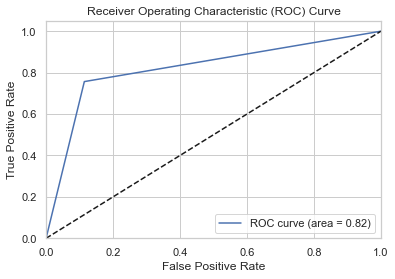

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17512\1367708102.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pt.colorbar()


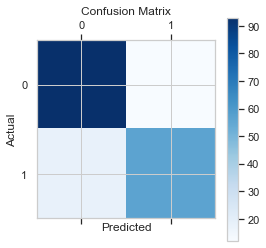

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

fpr, tpr, _ = roc_curve(y_test, y_pred)
pt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
pt.plot([0, 1], [0, 1], 'k--')
pt.xlim([0.0, 1.0])
pt.ylim([0.0, 1.05])
pt.xlabel('False Positive Rate')
pt.ylabel('True Positive Rate')
pt.title('Receiver Operating Characteristic (ROC) Curve')
pt.legend(loc="lower right")
pt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
pt.matshow(conf_matrix, cmap=pt.cm.Blues)
pt.colorbar()
pt.xlabel('Predicted')
pt.ylabel('Actual')
pt.title('Confusion Matrix')
pt.show()

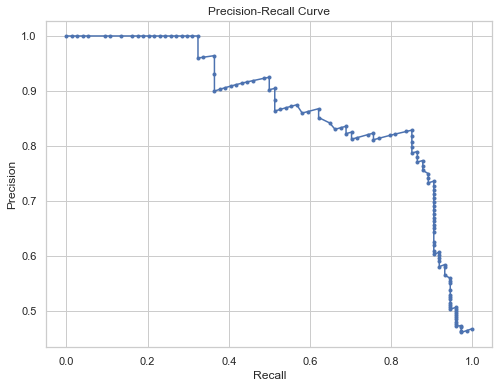

In [37]:
from sklearn.metrics import precision_recall_curve

y_scores = best_gb_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

pt.figure(figsize=(8, 6))
pt.plot(recall, precision, marker='.')
pt.xlabel('Recall')
pt.ylabel('Precision')
pt.title('Precision-Recall Curve')
pt.grid(True)
pt.show()

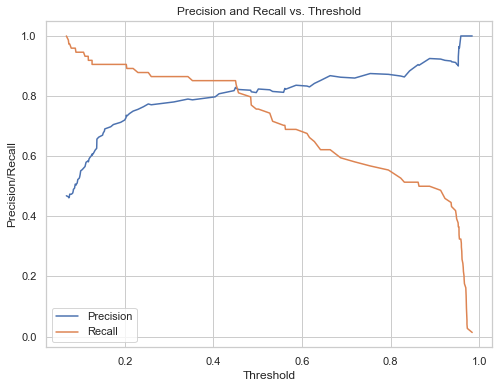

In [38]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pt.figure(figsize=(8, 6))
pt.plot(thresholds, precision[:-1], label='Precision')
pt.plot(thresholds, recall[:-1], label='Recall')
pt.xlabel('Threshold')
pt.ylabel('Precision/Recall')
pt.title('Precision and Recall vs. Threshold')
pt.legend()
pt.show()